# Proyecto sobre Prediciendo la diabetes de Luisa

In [79]:
import pandas as pd

# Definir la URL del archivo CSV
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

# Leer los datos desde la URL
df = pd.read_csv(url)

print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [80]:
# Mostrar información del DataFrame
print(df.info())

# Mostrar la forma del DataFrame filas, columnas
print("Forma del DataFrame:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Forma del DataFrame: (768, 9)


El conjunto de datos tiene 768 registros y 9 columnas, todas numéricas, lo que lo hace adecuado para análisis estadísticos y modelos de machine learning. No presenta valores nulos explícitos, pero algunas columnas como Glucose, BloodPressure, SkinThickness e Insulin contienen ceros que probablemente representen datos faltantes o erróneos, por lo que sería necesario limpiar estos valores antes del análisis. El objetivo (Outcome) es una variable binaria (0 = no diabético, 1 = diabético), lo que sugiere que el problema es de clasificación

## Análisis de variables univariadas

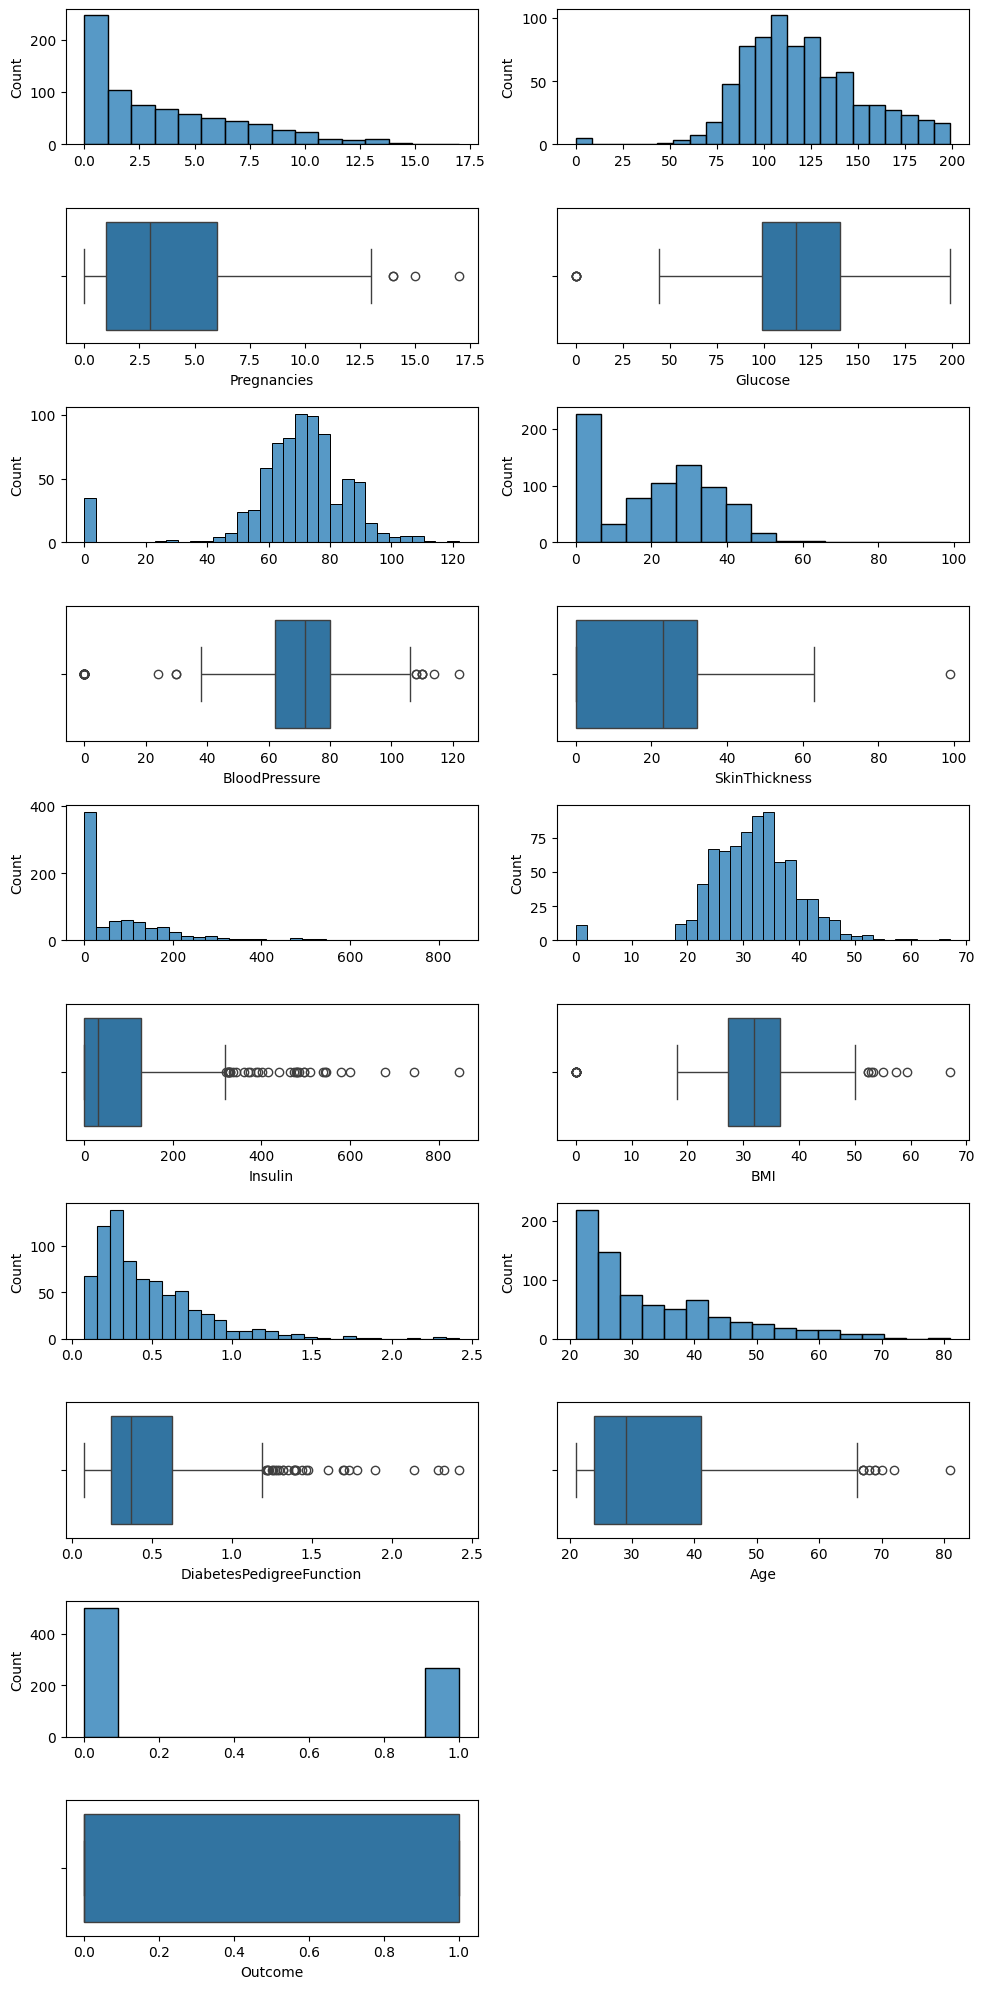

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los ejes
fig, axis = plt.subplots(10, 2, figsize=(10, 20))

# Crear histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=df, x="Pregnancies").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="Pregnancies")
sns.histplot(ax=axis[0, 1], data=df, x="Glucose").set(xlabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="Glucose")
sns.histplot(ax=axis[2, 0], data=df, x="BloodPressure").set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x="BloodPressure")
sns.histplot(ax=axis[2, 1], data=df, x="SkinThickness").set(xlabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x="SkinThickness")
sns.histplot(ax=axis[4, 0], data=df, x="Insulin").set(xlabel=None)
sns.boxplot(ax=axis[5, 0], data=df, x="Insulin")
sns.histplot(ax=axis[4, 1], data=df, x="BMI").set(xlabel=None)
sns.boxplot(ax=axis[5, 1], data=df, x="BMI")
sns.histplot(ax=axis[6, 0], data=df, x="DiabetesPedigreeFunction").set(xlabel=None)
sns.boxplot(ax=axis[7, 0], data=df, x="DiabetesPedigreeFunction")
sns.histplot(ax=axis[6, 1], data=df, x="Age").set(xlabel=None)
sns.boxplot(ax=axis[7, 1], data=df, x="Age")
sns.histplot(ax=axis[8, 0], data=df, x="Outcome").set(xlabel=None)
sns.boxplot(ax=axis[9, 0], data=df, x="Outcome")


plt.tight_layout()
fig.delaxes(axis[8, 1])
fig.delaxes(axis[9, 1])


plt.show()

 Se observa que algunas variables como Glucose, BMI y Age siguen distribuciones aproximadamente normales, mientras que otras como Insulin, DiabetesPedigreeFunction y Pregnancies presentan una fuerte asimetría positiva (sesgo a la derecha), con muchos valores bajos y unos pocos valores extremos altos. Varias variables, especialmente Insulin, SkinThickness y BloodPressure, tienen valores de cero que probablemente representen datos faltantes codificados erróneamente. Además, los diagramas de caja (boxplots) revelan la presencia de múltiples outliers en casi todas las variables continuas. Finalmente, la variable Outcome (resultado de diabetes) está desbalanceada, con más personas sin diabetes (0) que con diabetes (1).

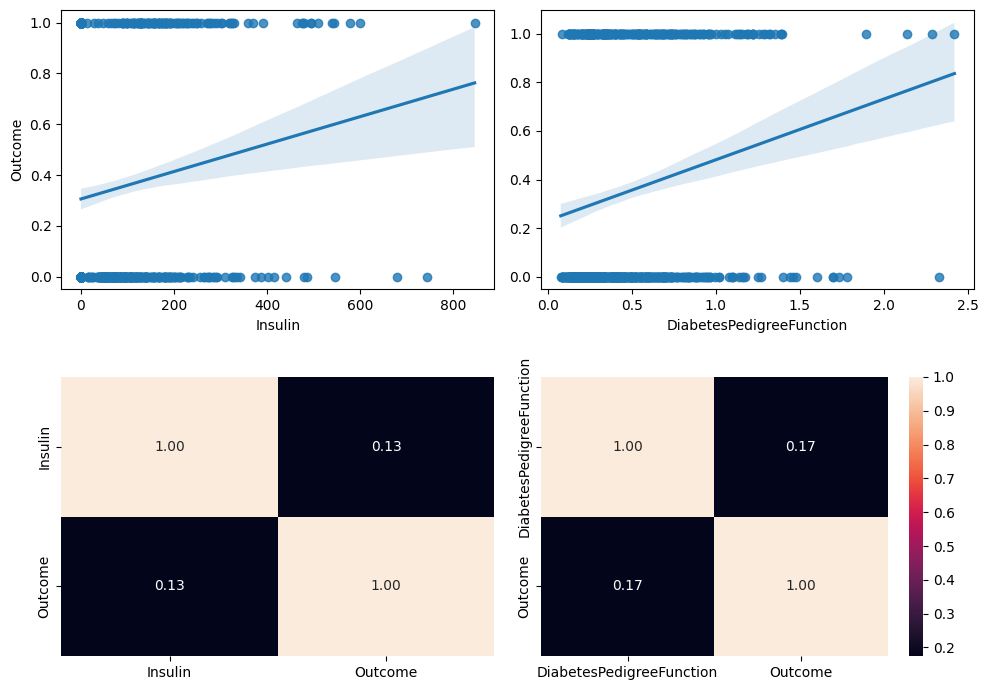

In [82]:
# Crear la figura y los ejes
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Diagramas de dispersión con líneas de regresión
sns.regplot(ax=axis[0, 0], data=df, x="Insulin", y="Outcome")
sns.heatmap(df[["Insulin", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=df, x="DiabetesPedigreeFunction", y="Outcome").set(ylabel=None)
sns.heatmap(df[["DiabetesPedigreeFunction", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

plt.tight_layout()

plt.show()

Un análisis de regresión lineal y correlación entre las variables Insulin y DiabetesPedigreeFunction respecto al Outcome (diagnóstico de diabetes). En ambas regresiones se observa una relación positiva: a medida que aumentan los niveles de insulina y el valor del índice hereditario, también lo hace la probabilidad de tener un resultado positivo para diabetes. Sin embargo, las bandas de confianza amplias sugieren una alta variabilidad. Los mapas de calor de correlación confirman estas relaciones, mostrando coeficientes bajos pero positivos: 0.13 entre Insulin y Outcome, y 0.17 entre DiabetesPedigreeFunction y Outcome, lo que indica correlaciones débiles pero relevantes.

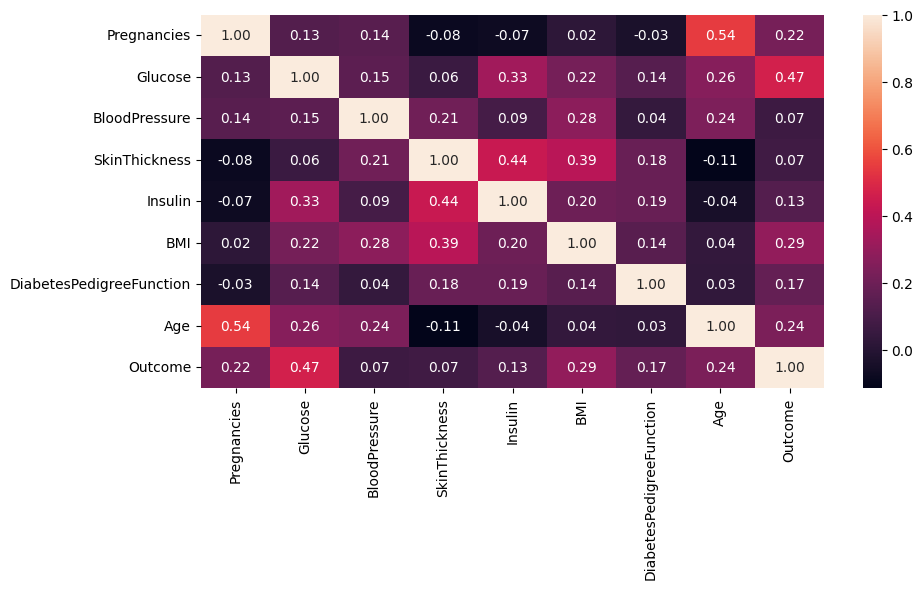

In [83]:
# Crear la figura y el eje
fig, axis = plt.subplots(figsize=(10, 6))

# Crear el mapa de calor de correlación
sns.heatmap(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", 
               "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()

plt.show()

Correlación entre todas las variables del conjunto de datos, destacando la relación lineal entre pares de variables mediante coeficientes de correlación de Pearson. Se observa que la variable Outcome (resultado de diabetes) tiene correlaciones moderadas con Glucose (0.47) y BMI (0.29), lo que sugiere que estas son las variables más relevantes para predecir la presencia de diabetes. Otras variables como Age (0.24), Pregnancies (0.22) y DiabetesPedigreeFunction (0.17) también muestran correlaciones positivas con el Outcome, aunque más débiles. Además, se destaca una fuerte correlación entre Insulin y SkinThickness (0.44), así como entre SkinThickness y BMI (0.39), lo que podría indicar cierta multicolinealidad.

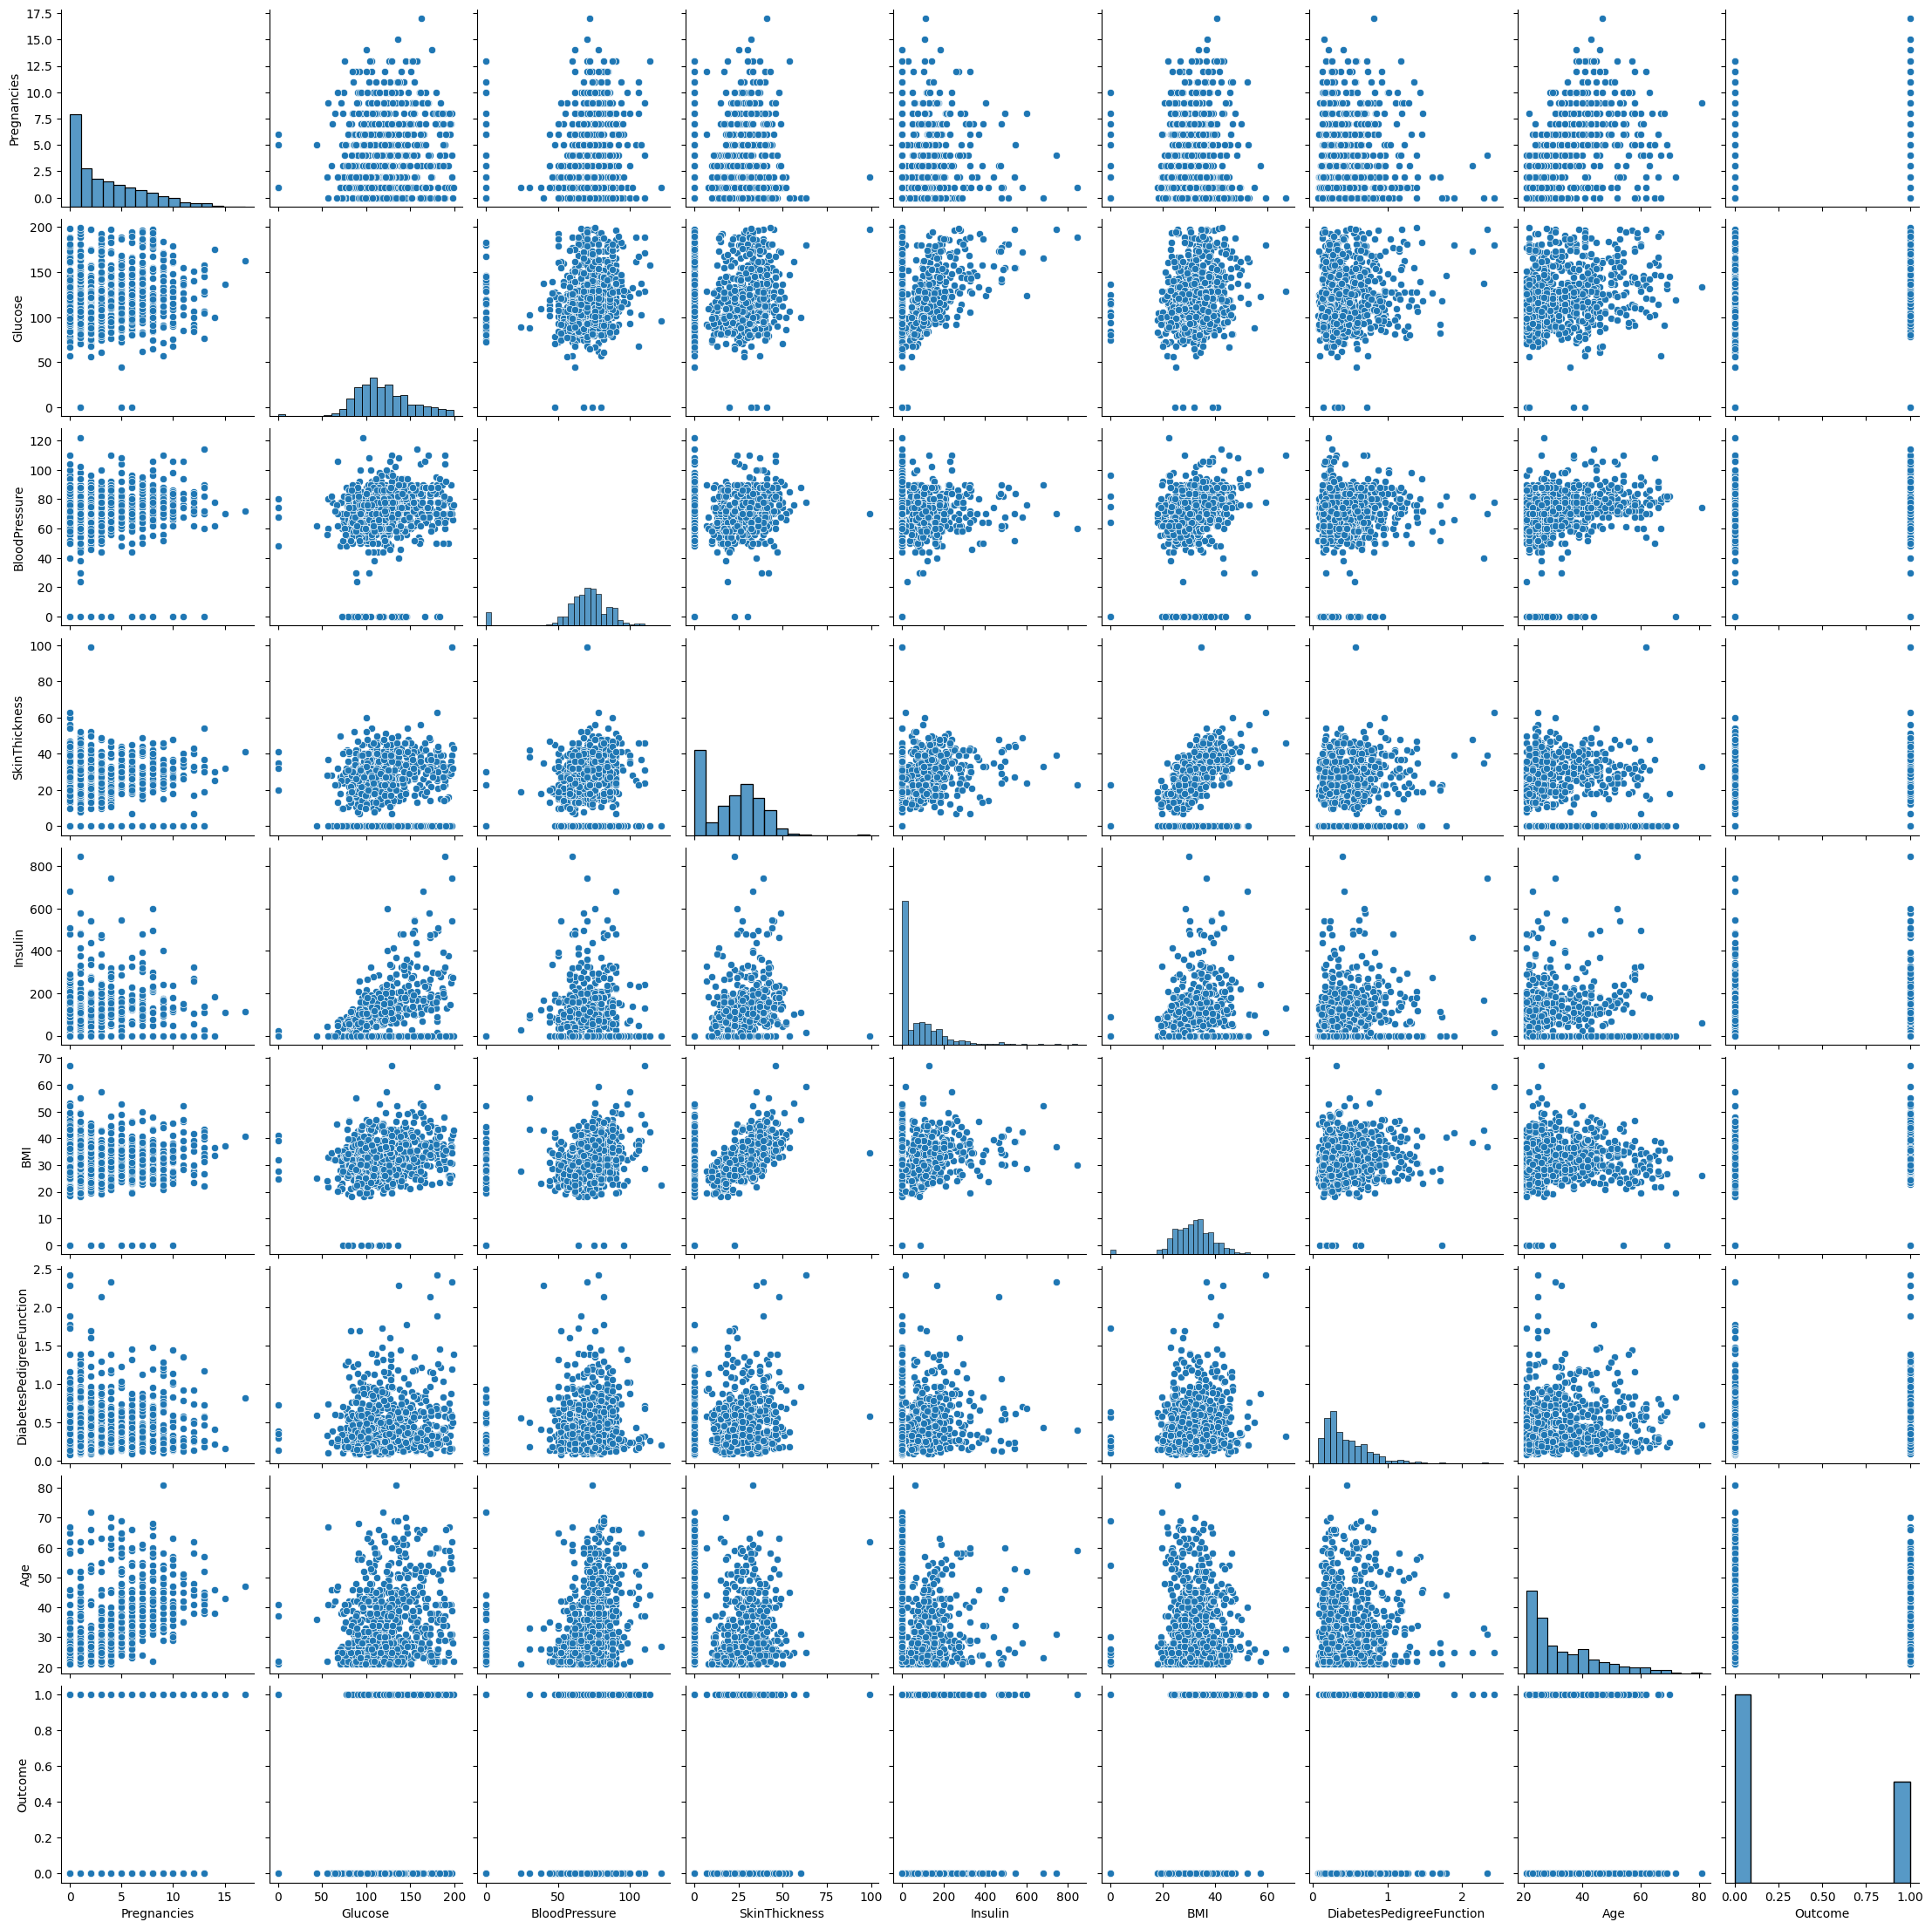

In [84]:
# Crear un pairplot
sns.pairplot(data=df)

# Mostrar el gráfico
plt.show()

In [85]:
# Describir el DataFrame
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


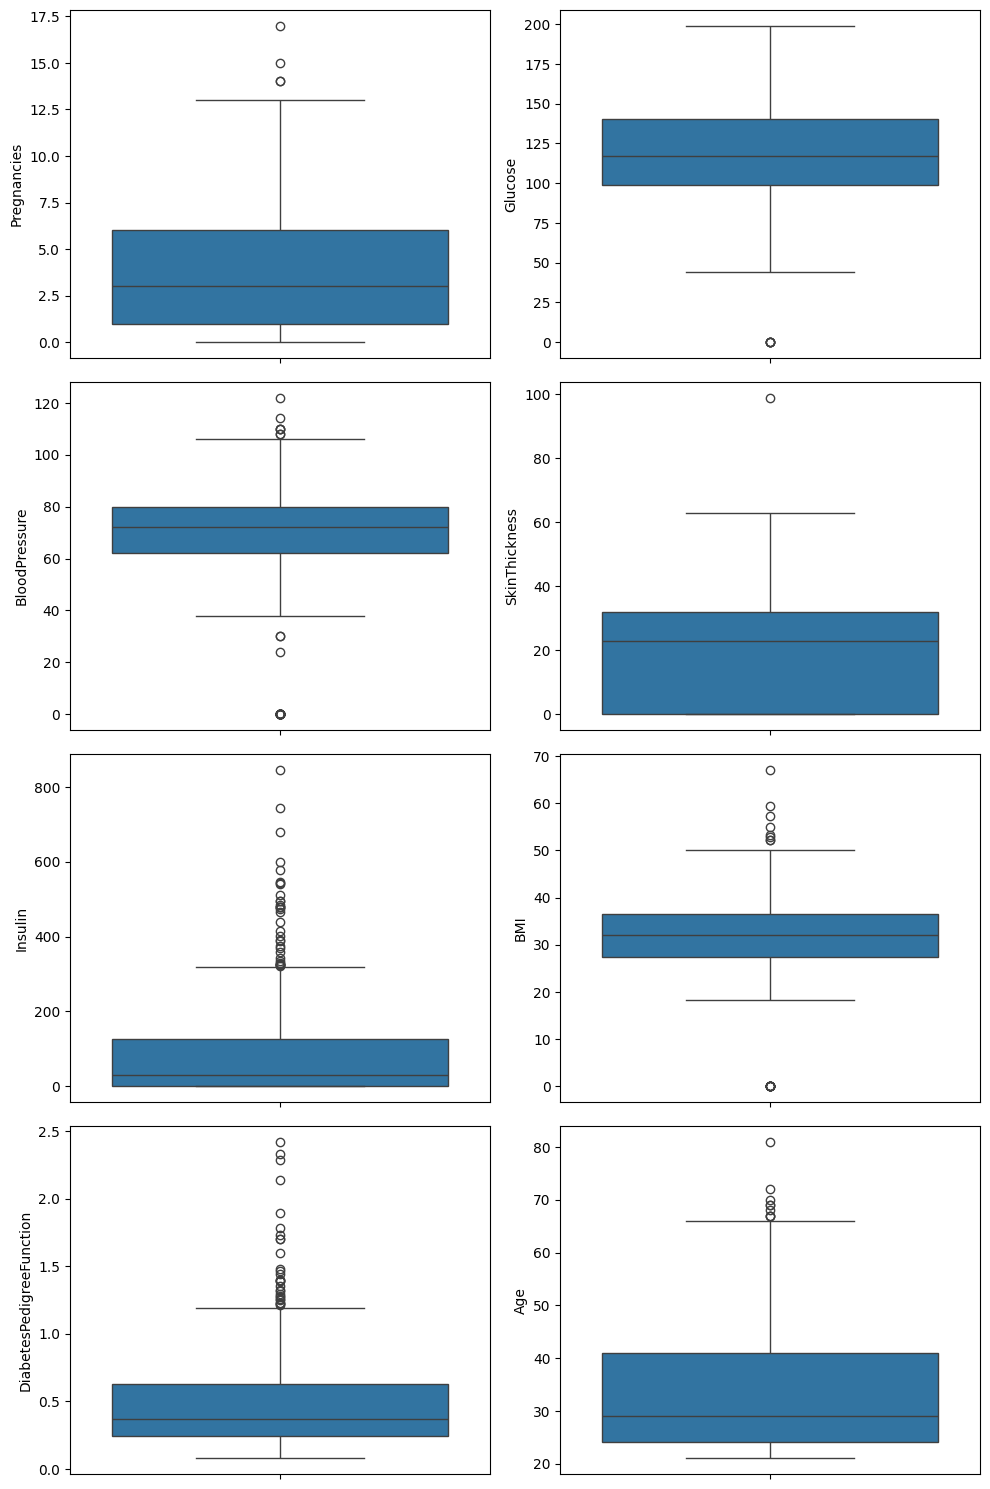

In [86]:
# Crear la figura y los ejes
fig, axis = plt.subplots(4, 2, figsize=(10, 15))

# Crear boxplots para cada variable
sns.boxplot(ax=axis[0, 0], data=df, y="Pregnancies")
sns.boxplot(ax=axis[0, 1], data=df, y="Glucose")
sns.boxplot(ax=axis[1, 0], data=df, y="BloodPressure")
sns.boxplot(ax=axis[1, 1], data=df, y="SkinThickness")
sns.boxplot(ax=axis[2, 0], data=df, y="Insulin")
sns.boxplot(ax=axis[2, 1], data=df, y="BMI")
sns.boxplot(ax=axis[3, 0], data=df, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[3, 1], data=df, y="Age")

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Se observa que variables como Insulin, DiabetesPedigreeFunction, BMI, Age y Pregnancies presentan múltiples outliers hacia el extremo superior, especialmente Insulin, que muestra una distribución altamente sesgada con valores extremadamente altos. También se identifican valores atípicos igual a cero en variables que normalmente no deberían tener ese valor, como Glucose, BloodPressure, SkinThickness, BMI e Insulin, lo cual sugiere la presencia de posibles errores o valores faltantes codificados como ceros. 

In [87]:
# Estadísticas descriptivas para la variable "Pregnancies"
pregnancy_stats = df["Pregnancies"].describe()

# Calcular el rango intercuartil (IQR)
pregnancy_iqr = pregnancy_stats["75%"] - pregnancy_stats["25%"]

# Límites superior e inferior para identificar valores atípicos
upper_limit = pregnancy_stats["75%"] + 1.5 * pregnancy_iqr
lower_limit = pregnancy_stats["25%"] - 1.5 * pregnancy_iqr

# Los límites y el rango intercuartil
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(pregnancy_iqr, 2)}")

The upper and lower limits for finding outliers are 13.5 and -6.5, with an interquartile range of 5.0


In [88]:
# Filtrar los datos donde "Pregnancies" es mayor a 13.5
print(df[df["Pregnancies"] > 13.5])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  


In [89]:
# Estadísticas descriptivas para la variable "Glucose"
Glucose_stats = df["Glucose"].describe()

# Calcular el rango intercuartil (IQR)
Glucose_iqr = Glucose_stats["75%"] - Glucose_stats["25%"]

# Límites superior e inferior para identificar valores atípicos
upper_limit = Glucose_stats["75%"] + 1.5 * Glucose_iqr
lower_limit = Glucose_stats["25%"] - 1.5 * Glucose_iqr


print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(Glucose_iqr, 2)}")

The upper and lower limits for finding outliers are 202.12 and 37.12, with an interquartile range of 41.25


In [90]:
# Filtrar los valores superiores a 202.12 para "Glucose"
print(f"Upper: \n {df[df['Glucose'] > 202.12]} ")

# Filtrar los valores inferiores a 37.12 para "Glucose"
print(f"Lower:\n {df[df['Glucose'] < 37.12]} ")

Upper: 
 Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: [] 
Lower:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1   


In [91]:
# Filtrar los registros donde 'Glucose' es mayor que 37.12
df = df[df['Glucose'] > 37.12]


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    int64  
 2   BloodPressure             763 non-null    int64  
 3   SkinThickness             763 non-null    int64  
 4   Insulin                   763 non-null    int64  
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 59.6 KB


In [92]:
# Estadísticas descriptivas para la variable "BloodPressure"
BloodPressure_stats = df["BloodPressure"].describe()

# Calcular el rango intercuartil (IQR)
BloodPressure_iqr = BloodPressure_stats["75%"] - BloodPressure_stats["25%"]

# Límites superior e inferior para identificar valores atípicos
upper_limit = BloodPressure_stats["75%"] + 1.5 * BloodPressure_iqr
lower_limit = BloodPressure_stats["25%"] - 1.5 * BloodPressure_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(BloodPressure_iqr, 2)}")

The upper and lower limits for finding outliers are 107.0 and 35.0, with an interquartile range of 18.0


In [93]:
# Filtrar los valores superiores a 107 para "BloodPressure"
print(f"Upper: \n {df[df['BloodPressure'] > 107]} ")

# Filtrar los valores inferiores a 17 para "BloodPressure"
print(f"Lower:\n {df[df['BloodPressure'] < 17]} ")

Upper: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
43             9      171            110             24      240  45.4   
84             5      137            108              0        0  48.8   
106            1       96            122              0        0  22.4   
177            0      129            110             46      130  67.1   
362            5      103            108             37        0  39.2   
549            4      189            110             31        0  28.5   
691           13      158            114              0        0  42.3   

     DiabetesPedigreeFunction  Age  Outcome  
43                      0.721   54        1  
84                      0.227   37        1  
106                     0.207   27        0  
177                     0.319   26        1  
362                     0.305   65        0  
549                     0.680   37        0  
691                     0.257   44        1   
Lower:
      Pregnancies  Glu

In [94]:
# Reemplazar los valores de "BloodPressure" menores a 17 por la media de "BloodPressure"
df.loc[df['BloodPressure'] < 17, 'BloodPressure'] = int(df['BloodPressure'].mean())

# Estadísticas descriptivas de "BloodPressure"
print(df["BloodPressure"].describe())

count    763.000000
mean      72.280472
std       12.119699
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


In [95]:
# Mostrar las estadísticas descriptivas de "SkinThickness"
print(df['SkinThickness'].describe())

count    763.000000
mean      20.477064
std       15.973171
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64


In [96]:
# Estadísticas descriptivas para la variable "SkinThickness"
SkinThickness_stats = df["SkinThickness"].describe()

# Calcular el rango intercuartil (IQR)
SkinThickness_iqr = SkinThickness_stats["75%"] - SkinThickness_stats["25%"]

# Límites superior e inferior para identificar valores atípicos
upper_limit = SkinThickness_stats["75%"] + 1.5 * SkinThickness_iqr
lower_limit = SkinThickness_stats["25%"] - 1.5 * SkinThickness_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(SkinThickness_iqr, 2)}")

The upper and lower limits for finding outliers are 80.0 and -48.0, with an interquartile range of 32.0


In [97]:
# Filtrar los valores superiores a 80 para "SkinThickness"
print(f"Upper: \n {df[df['SkinThickness'] > 80]} ")

# Filtrar los valores inferiores a -48 para "SkinThickness"
print(f"Lower:\n {df[df['SkinThickness'] < -48]} ")

# Filtrar los valores iguales a 0 para "SkinThickness"
print(f"0:\n {df[df['SkinThickness'] == 0]} ")

Upper: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
579            2      197             70             99        0  34.7   

     DiabetesPedigreeFunction  Age  Outcome  
579                     0.575   62        1   
Lower:
 Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: [] 
0:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8      183             64              0        0  23.3   
5              5      116             74              0        0  25.6   
7             10      115             69              0        0  35.3   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
..           ...      ...            ...            ...      ...   ...   
757            0      123             72              0        0  36.3   
75

In [98]:
# Reemplazar los valores de "SkinThickness" menores a 17 por la media de "SkinThickness"
df.loc[df['SkinThickness'] < 17, 'SkinThickness'] = int(df['SkinThickness'].mean())


print(df["SkinThickness"].describe())

count    763.000000
mean      26.973788
std        9.123207
min       17.000000
25%       20.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64


In [99]:
# Estadísticas descriptivas para la variable "Insulin"
Insulin_stats = df["Insulin"].describe()

# Calcular el rango intercuartil (IQR)
Insulin_iqr = Insulin_stats["75%"] - Insulin_stats["25%"]

# Límites superior e inferior para identificar valores atípicos
upper_limit = Insulin_stats["75%"] + 1.5 * Insulin_iqr
lower_limit = Insulin_stats["25%"] - 1.5 * Insulin_iqr


print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(Insulin_iqr, 2)}")

The upper and lower limits for finding outliers are 321.25 and -192.75, with an interquartile range of 128.5


In [100]:
# Filtrar los valores superiores a 321.25 para "Insulin"
print(f"Upper: \n {df[df['Insulin'] > 321.25]} ")

# Filtrar los valores inferiores a -192.75 para "Insulin"
print(f"Lower:\n {df[df['Insulin'] < -192.75]} ")

# Filtrar los valores iguales a 0 para "Insulin"
print(f"0:\n {df[df['Insulin'] == 0]} ")

Upper: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
54             7      150             66             42      342  34.7   
111            8      155             62             26      495  34.0   
139            5      105             72             29      325  36.9   
153            1      153             82             42      485  40.6   
186            8      181             68             36      495  30.1   
220            0      177             60             29      478  34.6   
228            4      197             70             39      744  36.7   
231            6      134             80             37      370  46.2   
247            0      165             90             33      680  52.3   
248            9      124             70             33      402  35.4   
258            1      193    

In [101]:
# Reemplazar los valores de "Insulin" menores a 17 por la media de "Insulin"
df.loc[df['Insulin'] < 17, 'Insulin'] = int(df['Insulin'].mean())

print(df["Insulin"].describe())

count    763.000000
mean     119.342071
std       93.039938
min       18.000000
25%       80.000000
50%       80.000000
75%      128.500000
max      846.000000
Name: Insulin, dtype: float64


In [102]:
# Estadísticas descriptivas para la variable "BMI"
BMI_stats = df["BMI"].describe()

# Calcular el rango intercuartil (IQR)
BMI_iqr = BMI_stats["75%"] - BMI_stats["25%"]

# Límites superior e inferior para identificar valores atípicos
upper_limit = BMI_stats["75%"] + 1.5 * BMI_iqr
lower_limit = BMI_stats["25%"] - 1.5 * BMI_iqr


print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(BMI_iqr, 2)}")

The upper and lower limits for finding outliers are 50.42 and 13.43, with an interquartile range of 9.25


In [103]:
# Filtrar los valores superiores a 50.42 para "BMI"
print(f"Upper: \n {df[df['BMI'] > 50.42]} ")

# Filtrar los valores inferiores a 13.43 para "BMI"
print(f"Lower:\n {df[df['BMI'] < 13.43]} ")

Upper: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
120            0      162             76             56      100  53.2   
125            1       88             30             42       99  55.0   
177            0      129            110             46      130  67.1   
193           11      135             69             20       80  52.3   
247            0      165             90             33      680  52.3   
303            5      115             98             20       80  52.9   
445            0      180             78             63       80  59.4   
673            3      123            100             35      240  57.3   

     DiabetesPedigreeFunction  Age  Outcome  
120                     0.759   25        1  
125                     0.496   26        1  
177                     0.319   26        1  
193                     0.578   40        1  
247                     0.427   23        0  
303                     0.209   28        1  
44

In [104]:
# Filtrar los valores de "BMI" mayores a 13.43
df = df[df['BMI'] > 13.43]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               752 non-null    int64  
 1   Glucose                   752 non-null    int64  
 2   BloodPressure             752 non-null    int64  
 3   SkinThickness             752 non-null    int64  
 4   Insulin                   752 non-null    int64  
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  752 non-null    float64
 7   Age                       752 non-null    int64  
 8   Outcome                   752 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.8 KB


In [105]:
# Estadísticas descriptivas para la variable "DiabetesPedigreeFunction"
DiabetesPedigreeFunction_stats = df["DiabetesPedigreeFunction"].describe()

# Calcular el rango intercuartil (IQR)
DiabetesPedigreeFunction_iqr = DiabetesPedigreeFunction_stats["75%"] - DiabetesPedigreeFunction_stats["25%"]

# Límites superior e inferior para identificar valores atípicos
upper_limit = DiabetesPedigreeFunction_stats["75%"] + 1.5 * DiabetesPedigreeFunction_iqr
lower_limit = DiabetesPedigreeFunction_stats["25%"] - 1.5 * DiabetesPedigreeFunction_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(DiabetesPedigreeFunction_iqr, 2)}")

The upper and lower limits for finding outliers are 1.2 and -0.33, with an interquartile range of 0.38


In [106]:
# Filtrar los valores superiores a 1.2 para "DiabetesPedigreeFunction"
print(f"Upper: \n {df[df['DiabetesPedigreeFunction'] > 1.2]} ")

# Filtrar los valores inferiores a -0.33 para "DiabetesPedigreeFunction"
print(f"Lower:\n {df[df['DiabetesPedigreeFunction'] < -0.33]} ")

Upper: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
12            10      139             80             20       80  27.1   
39             4      111             72             47      207  37.1   
45             0      180             66             39       80  42.0   
58             0      146             82             20       80  40.5   
100            1      163             72             20       80  39.0   
147            2      106             64             35      119  30.5   
187            1      128             98             41       58  32.0   
218            5       85             74             22       80  29.0   
228            4      197             70             39      744  36.7   
243            6      119             50             22      176  27.1   
245            9      184             85             20       80  30.0   
259           11      155    

In [107]:
# Estadísticas descriptivas para la variable "Age"
Age_stats = df["Age"].describe()

# Calcular el rango intercuartil (IQR)
Age_iqr = Age_stats["75%"] - Age_stats["25%"]

# Límites superior e inferior para identificar valores atípicos
upper_limit = Age_stats["75%"] + 1.5 * Age_iqr
lower_limit = Age_stats["25%"] - 1.5 * Age_iqr


print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(Age_iqr, 2)}")

The upper and lower limits for finding outliers are 66.5 and -1.5, with an interquartile range of 17.0


In [108]:
# Filtrar los valores superiores a 66.5 para "Age"
print(f"Upper: \n {df[df['Age'] > 66.5]} ")

# Filtrar los valores inferiores a -1.5 para "Age"
print(f"Lower:\n {df[df['Age'] < -1.5]} ")

# Filtrar los valores iguales a 0 para "Age"
print(f"Lower:\n {df[df['Age'] == 0]} ")

Upper: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
123            5      132             80             20       80  26.8   
363            4      146             78             20       80  38.5   
453            2      119             69             20       80  19.6   
459            9      134             74             33       60  25.9   
489            8      194             80             20       80  26.1   
537            0       57             60             20       80  21.7   
666            4      145             82             18       80  32.5   
674            8       91             82             20       80  35.6   

     DiabetesPedigreeFunction  Age  Outcome  
123                     0.186   69        0  
363                     0.520   67        1  
453                     0.832   72        0  
459                     0.460   81        0  
489                     0.551   67        0  
537                     0.735   67        0  
66

In [109]:
# Contar los valores nulos en el DataFrame y ordenarlos de mayor a menor
print(df.isnull().sum().sort_values(ascending=False))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [110]:
from sklearn.preprocessing import MinMaxScaler
# Definir las variables numéricas
num_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Inicializar el escalador MinMax
scaler = MinMaxScaler()

# Escalar las características numéricas
scal_features = scaler.fit_transform(df[num_variables])

# Crear un nuevo DataFrame con las características escaladas
total_data_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)


total_data_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.219512,0.074879,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.146341,0.074879,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.036585,0.074879,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.073171,0.091787,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.219512,0.181159,0.509202,0.943638,0.200000,1.0


In [111]:
from sklearn.model_selection import train_test_split

# Definir X (características) y y (etiqueta)
X = total_data_scal.drop("Outcome", axis = 1)
y = total_data_scal["Outcome"]

# Dividir los datos en conjunto de entrenamiento y prueba (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
599,0.058824,0.419355,0.142857,0.012195,0.123188,0.100204,0.140478,0.083333
136,0.000000,0.361290,0.469388,0.109756,0.038647,0.257669,0.221605,0.000000
45,0.000000,0.877419,0.428571,0.268293,0.074879,0.486708,0.774979,0.066667
73,0.235294,0.548387,0.632653,0.036585,0.304348,0.345603,0.065329,0.033333
508,0.117647,0.258065,0.265306,0.073171,0.070048,0.249489,0.380017,0.000000


In [112]:
import os

# Crear el directorio si no existe
os.makedirs("/workspaces/predictingDiabetes/data/processed", exist_ok=True)

# Asignar la columna "Outcome" a X_train y X_test
X_train["Outcome"] = y_train.values
X_test["Outcome"] = y_test.values

# Guardar los conjuntos de entrenamiento y prueba como archivos CSV
X_train.to_csv("/workspaces/predictingDiabetes/data/processed/diabetes_train.csv", index = False)
X_test.to_csv("/workspaces/predictingDiabetes/data/processed/diabetes_test.csv", index = False)


In [113]:
# Leer los archivos CSV de los datos de entrenamiento y prueba
train_data = pd.read_csv("/workspaces/predictingDiabetes/data/processed/diabetes_train.csv")
test_data = pd.read_csv("/workspaces/predictingDiabetes/data/processed/diabetes_test.csv")


train_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.058824,0.419355,0.142857,0.012195,0.123188,0.100204,0.140478,0.083333,0.0
1,0.000000,0.361290,0.469388,0.109756,0.038647,0.257669,0.221605,0.000000,0.0
2,0.000000,0.877419,0.428571,0.268293,0.074879,0.486708,0.774979,0.066667,1.0
3,0.235294,0.548387,0.632653,0.036585,0.304348,0.345603,0.065329,0.033333,0.0
4,0.117647,0.258065,0.265306,0.073171,0.070048,0.249489,0.380017,0.000000,0.0


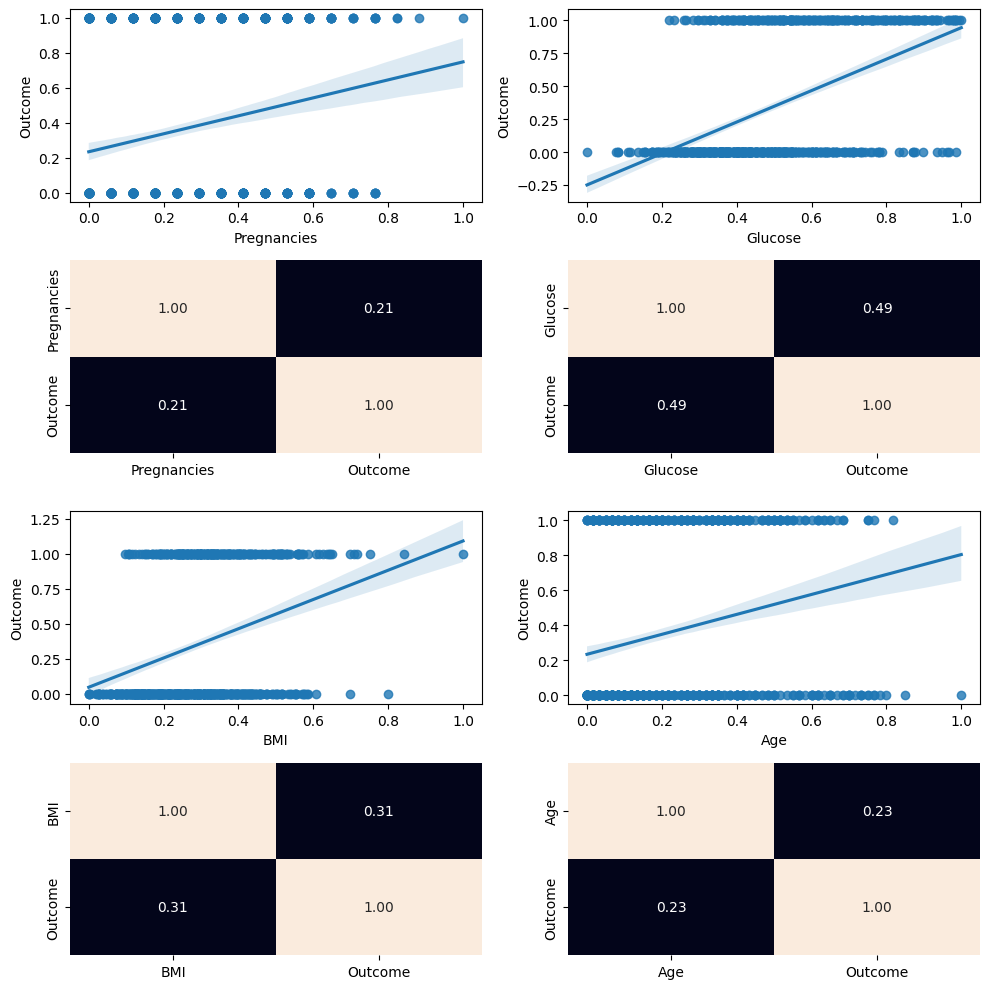

In [114]:
# Crear una figura con subgráficas
fig, axis = plt.subplots(4, 2, figsize=(10, 10))

# Unir los datos de entrenamiento y prueba
total_data = pd.concat([train_data, test_data])

# Graficar los diagramas de dispersión y los mapas de calor
sns.regplot(ax=axis[0, 0], data=total_data, x="Pregnancies", y="Outcome")
sns.heatmap(total_data[["Pregnancies", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=total_data, x="Glucose", y="Outcome")
sns.heatmap(total_data[["Glucose", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(ax=axis[2, 0], data=total_data, x="BMI", y="Outcome")
sns.heatmap(total_data[["BMI", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

sns.regplot(ax=axis[2, 1], data=total_data, x="Age", y="Outcome")
sns.heatmap(total_data[["Age", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)


plt.tight_layout()


plt.show()

En la parte superior de la diagonal, los gráficos de dispersión (regplot) muestran las relaciones lineales entre cada variable y el resultado, donde se puede observar que "Glucose" tiene una correlación más fuerte con "Outcome" (0.49) en comparación con las demás variables, como "Pregnancies" (0.21) y "Age" (0.23). En la parte inferior de la diagonal, los mapas de calor muestran las correlaciones entre las variables, destacando que "Glucose" y "Outcome" tienen una relación moderada (0.49), mientras que "Pregnancies" y "Outcome" tienen una relación débil (0.21). 

In [115]:
# Separar el conjunto de datos en características (X) y la etiqueta (y)
X = df.drop("Outcome", axis=1)  # Eliminar la columna "Outcome" de las características
y = df["Outcome"]  # La columna "Outcome" es nuestra variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar las primeras 5 filas de los conjuntos de entrenamiento y prueba
print("X_train:")
print(X_train.head())

print("\nX_test:")
print(X_test.head())

print("\ny_train:")
print(y_train.head())

print("\ny_test:")
print(y_test.head())

X_train:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
230            4      142             86             20       80  44.0   
381            0      105             68             22       80  20.0   
419            3      129             64             29      115  26.4   
372            0       84             64             22       66  35.8   
313            3      113             50             20       85  29.5   

     DiabetesPedigreeFunction  Age  
230                     0.645   22  
381                     0.236   22  
419                     0.219   28  
372                     0.545   21  
313                     0.626   25  

X_test:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
598            1      173             74             20       80  36.8   
605            1      124             60             32       80  35.8   
498            7      195             70             33      145  25.1   
82             7   

# Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de Árbol de Decisión
modelDT = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelDT.fit(X_train, y_train)

# Verificar la precisión en el conjunto de prueba
accuracy = modelDT.score(X_test, y_test)

# Mostrar la precisión en el conjunto de prueba
print("Precisión del modelo en el conjunto de prueba:", accuracy)

Precisión del modelo en el conjunto de prueba: 0.7035398230088495


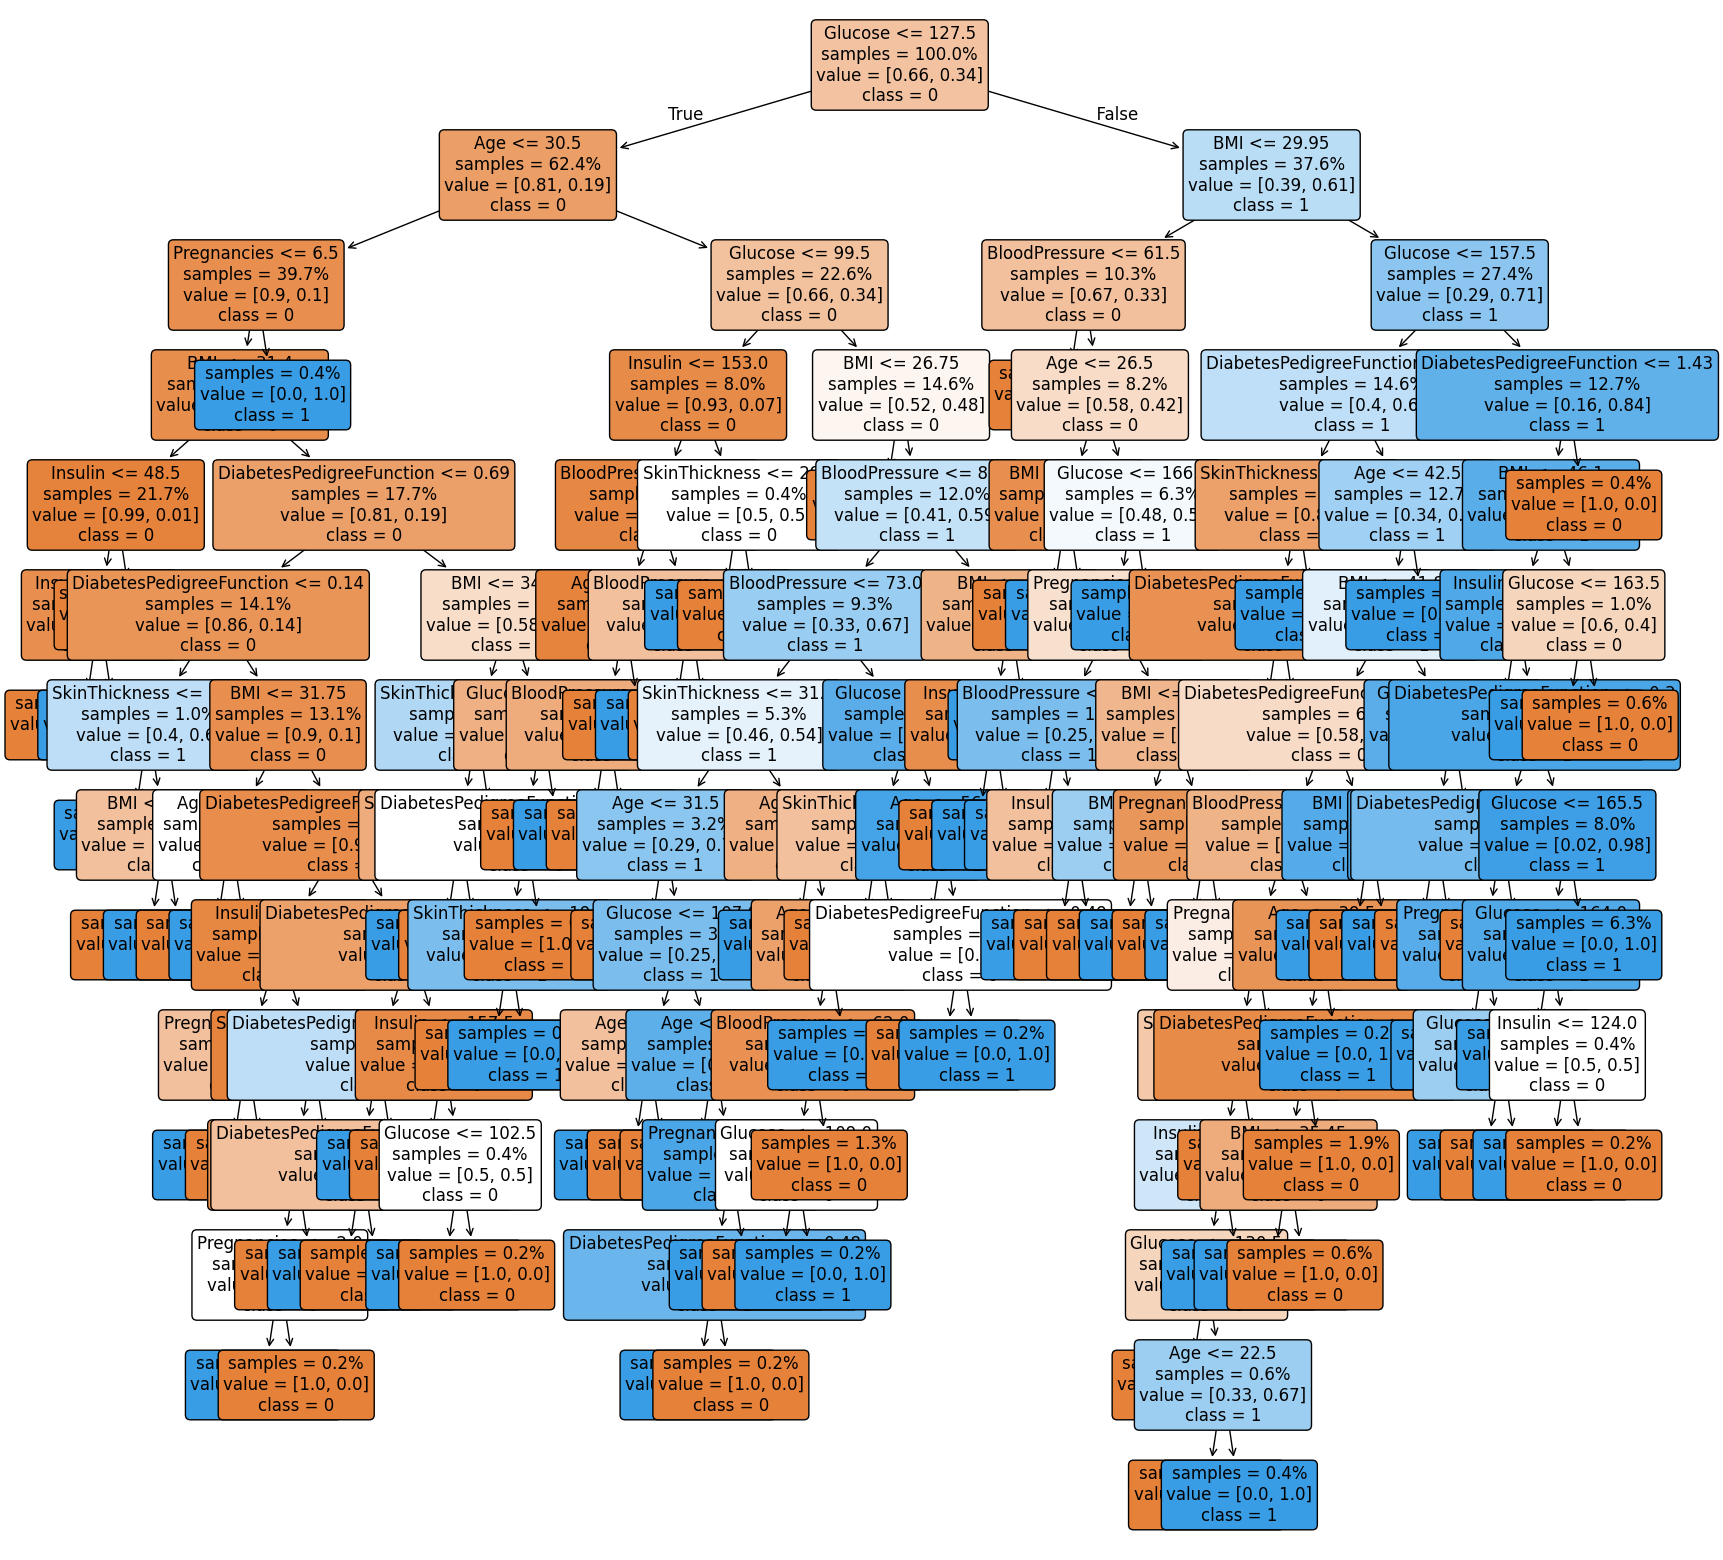

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Crear la figura para la visualización
fig = plt.figure(figsize=(20, 20))

# Graficar el árbol de decisión con opciones para diferenciar la gráfica
tree.plot_tree(modelDT, 
               feature_names=list(X_train.columns), 
               class_names=["0", "1"],  # Solo hay dos clases en "Outcome"
               filled=True,             # Colores según la pureza de los nodos
               rounded=True,            # Bordes redondeados
               fontsize=12,             # Tamaño de la fuente
               impurity=False,          # No mostrar los valores de Gini en los nodos
               proportion=True,         # Mostrar las proporciones de clases en los nodos
               precision=2)             # Limitar la precisión de las fracciones


plt.show()


In [118]:
# Realizar la predicción sobre el conjunto de prueba
y_pred = modelDT.predict(X_test)

print("Predicciones del modelo en el conjunto de prueba:")
print(y_pred)

Predicciones del modelo en el conjunto de prueba:
[1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0]


In [119]:
from sklearn.metrics import accuracy_score

# Calcular la precisión del modelo usando accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo en el conjunto de prueba:", accuracy)

Precisión del modelo en el conjunto de prueba: 0.7035398230088495


# OPTIMIZACION MODELO

In [122]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Definir los parámetros para GridSearchCV
params = {
  "random_state": [42],
  "max_depth": [4, 8, 10, 30, 50],
  "min_samples_split": [10, 30, 50, 100],
  "min_samples_leaf": [10, 30, 50, 100],
  "criterion": ["gini", "entropy", "log_loss"],
  "splitter": ["best", "random"]
}

# Crear el modelo de Árbol de Decisión
modelDT_Opt = DecisionTreeClassifier()

# Realizar la búsqueda de hiperparámetros con GridSearchCV
clf = GridSearchCV(modelDT_Opt, params, cv=5, return_train_score=True, scoring='accuracy')
search = clf.fit(X_train, y_train)

# Obtener los resultados de la búsqueda
results_GridSearchCV = search.cv_results_

# Obtener el mejor conjunto de parámetros
best_params = search.best_index_

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(results_GridSearchCV['params'][best_params])

Mejores parámetros encontrados:
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 100, 'random_state': 42, 'splitter': 'best'}


In [123]:
# Crear el modelo de Árbol de Decisión con parámetros específicos
modelDT = DecisionTreeClassifier(
    random_state=42,
    criterion='entropy',
    max_depth=4,
    min_samples_leaf=30,
    min_samples_split=100,
    splitter='best'
)

# Entrenar el modelo con los datos de entrenamiento
modelDT.fit(X_train, y_train)

# Mostrar el modelo entrenado
print("Modelo entrenado con los parámetros especificados")

Modelo entrenado con los parámetros especificados


In [124]:
# Realizar las predicciones sobre el conjunto de prueba
y_pred = modelDT.predict(X_test)

# Mostrar las predicciones
print("Predicciones del modelo en el conjunto de prueba:")
print(y_pred)

Predicciones del modelo en el conjunto de prueba:
[1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1
 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 1 0 0 0]


In [125]:
# Calcular la precisión del modelo
base_accuracy = accuracy_score(y_test, y_pred)

# Mostrar la precisión
print("Precisión del modelo en el conjunto de prueba:", base_accuracy)

Precisión del modelo en el conjunto de prueba: 0.7566371681415929


Conclusión: El modelo de árbol de decisión optimizado ha logrado una precisión de aproximadamente 76% al predecir los resultados en el conjunto de prueba. Esto sugiere que el modelo tiene un rendimiento relativamente bueno en la clasificación de los casos en los que se determina si una persona tiene o no diabetes, basándose en las características proporcionadas.

In [127]:
import os
from pickle import dump

# Definir la ruta donde se guardará el archivo
directory = "/workspaces/predictingDiabetes/models/"

# Verificar si el directorio existe, si no, crearlo
if not os.path.exists(directory):
    os.makedirs(directory)

# Guardar el modelo
dump(modelDT, open(os.path.join(directory, "DecisionTreeOptimized.sav"), "wb"))